In [1]:
from datautils import load
df = load()

In [26]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df.describe()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
count,1166835.0,1166835,1166835,1166835.0,1166835,1166835.0,1166835,1166835,1166835
unique,200153.0,425,425,39901.0,3,3254.0,5,195,217686
top,2209265.0,2016-08-08 00:00:00,2016-08-10 00:00:00,47499.0,desktop,9924.0,Gondal,Cobra Island,3635431_3
freq,172.0,9672,9549,11242.0,753860,277775.0,536036,137791,48
first,NaN,2015-12-31 00:00:00,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-02-27 00:00:00,2017-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


- 3 Device Classes
- 5 Booker Countries out of 195
- Dates from 31/12/2015 - 28/02/2017
- 39901 unique cities
- 3254 affiliates

### Hotel Country - Booker Country Correlation

[(0, 12), Text(0, 0.5, 'Countries'), Text(0.5, 0, 'Number of Bookings')]

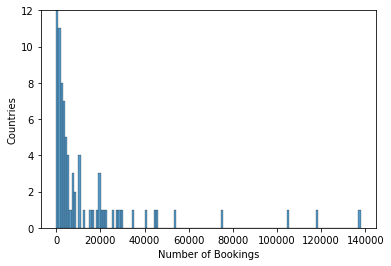

In [56]:
g = sns.histplot(Counter(df['hotel_country']))
g.set(ylim = (0,12), xlabel = 'Number of Bookings', ylabel = 'Countries')

Text(0, 0.5, 'Number of Bookings')

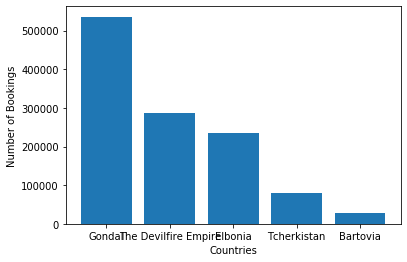

In [57]:
c = Counter(df['booker_country'])
fig = plt.bar(c.keys(), c.values())
plt.xlabel('Countries')
plt.ylabel('Number of Bookings')

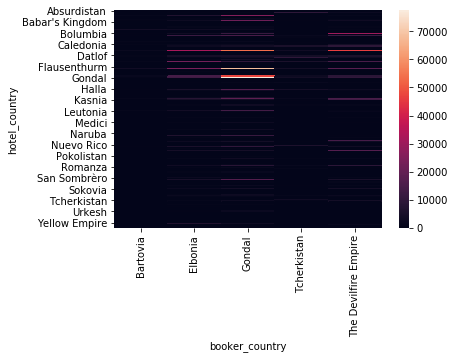

In [59]:
booker_to_hotel = df.pivot_table(index='hotel_country', columns='booker_country', values='utrip_id', aggfunc=len).fillna(0)
sns.heatmap(booker_to_hotel)

### Day of Week and Length of Trip